TASK 1	(30 Marks)

PharmaData.xlsx contains product sales data for eight branches of a certain pharmacy.

Create two appropriate visualizations in Tableau to demonstrate two different applications of LOD Calculations. Discuss how your visualizations wouldn’t be possible without LOD calculations and provide insights gleaned from these visualizations.


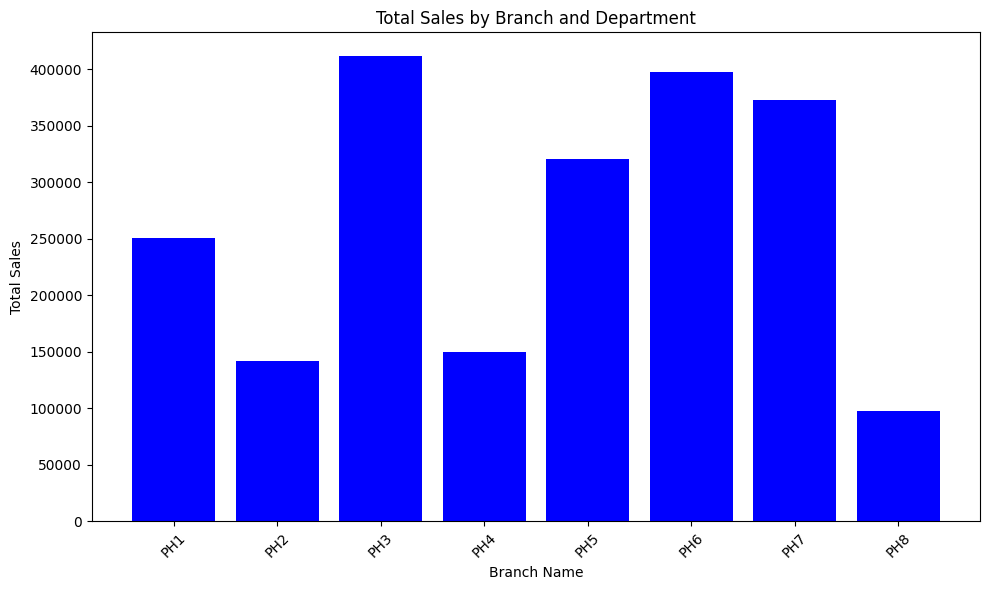

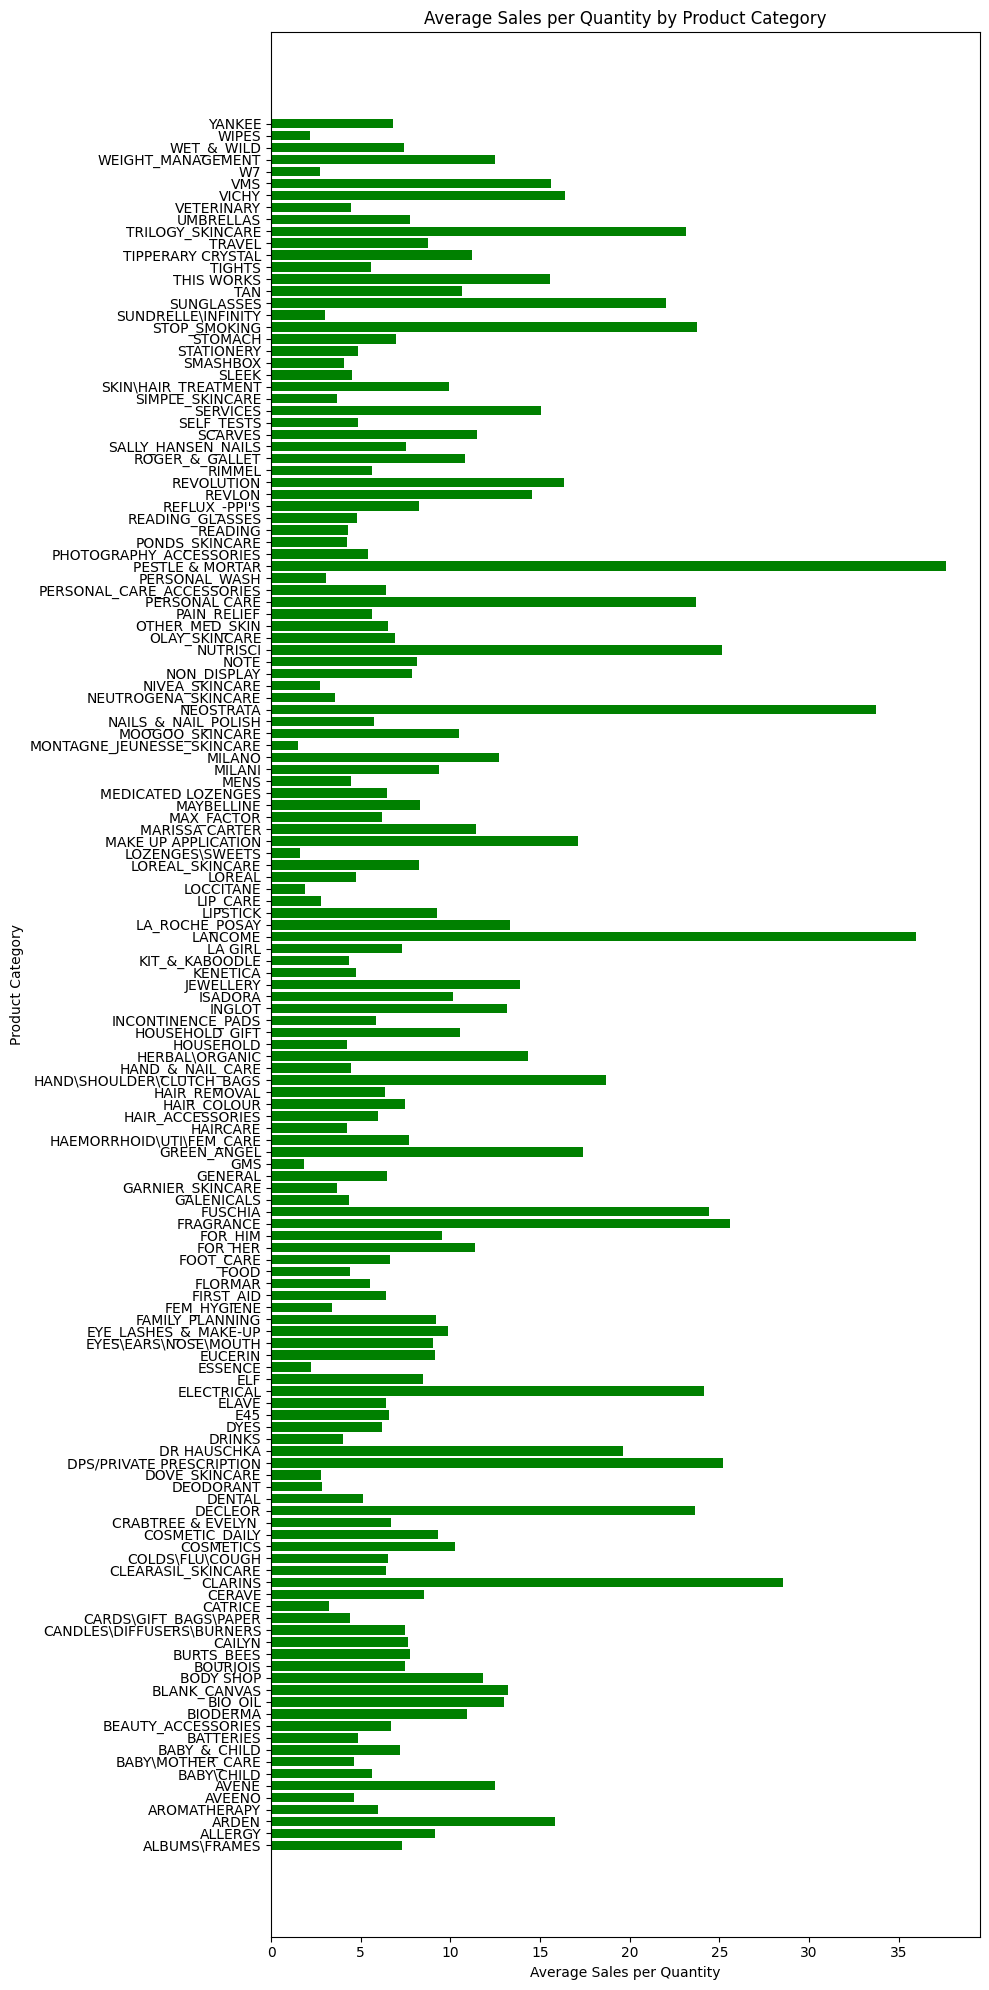

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
data = pd.read_excel('PharmaData.xlsx')

# Visualization 1: Total Sales by Branch Name and Department
sales_by_branch = data.groupby(['Branch Name', 'Department'])['Sales'].sum().reset_index()

# Visualization 1: Bar chart
plt.figure(figsize=(10, 6))
plt.bar(sales_by_branch['Branch Name'], sales_by_branch['Sales'], color='b')
plt.xlabel('Branch Name')
plt.ylabel('Total Sales')
plt.title('Total Sales by Branch and Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 2: Average Sales per Quantity by Product Category
data['Avg_Sales_Per_Qty'] = data['Sales'] / data['Qty']
avg_sales_by_category = data.groupby('Product Category')['Avg_Sales_Per_Qty'].mean().reset_index()

# Visualization 2: Horizontal bar chart
plt.figure(figsize=(10, 20))
plt.barh(avg_sales_by_category['Product Category'], avg_sales_by_category['Avg_Sales_Per_Qty'], color='g')
plt.xlabel('Average Sales per Quantity')
plt.ylabel('Product Category')
plt.title('Average Sales per Quantity by Product Category')
plt.tight_layout()
plt.show()


TASK 2	(35 Marks)

Refer to dataset at - online_shoppers_intention.csv


Use PCA and UMAP dimensionality reduction techniques in Python to visually explore if online shoppers’ purchasing intention can be determined by the number of different types of pages (administrative, informational, product related) visited and the total time spent in each of these page categories. Discuss which technique worked better for visual exploration and why? Provide insights gleaned from visualizations.


In [ ]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82813 sha256=f627f9060f6d7fe2211c860981b0aee9f48838add6c7d2aa7f19a170993ad0d8
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55621 sha256=5cdcf6b62aa4cead35d315db27f6745b5f13dd30669e08e281b04c863993ae43
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


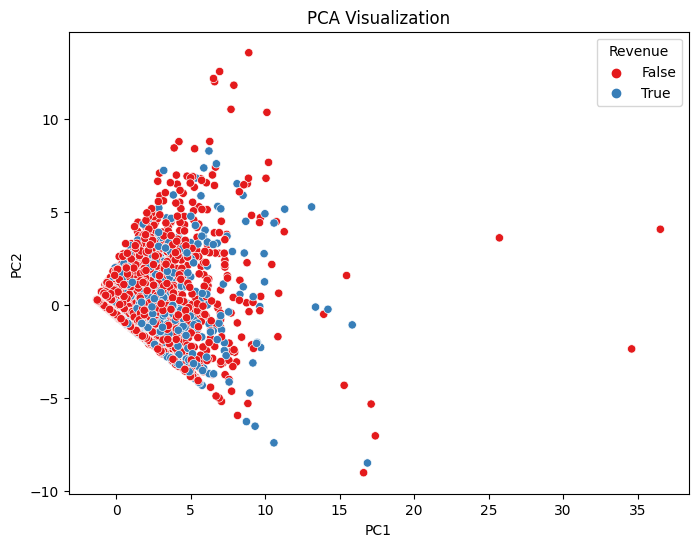

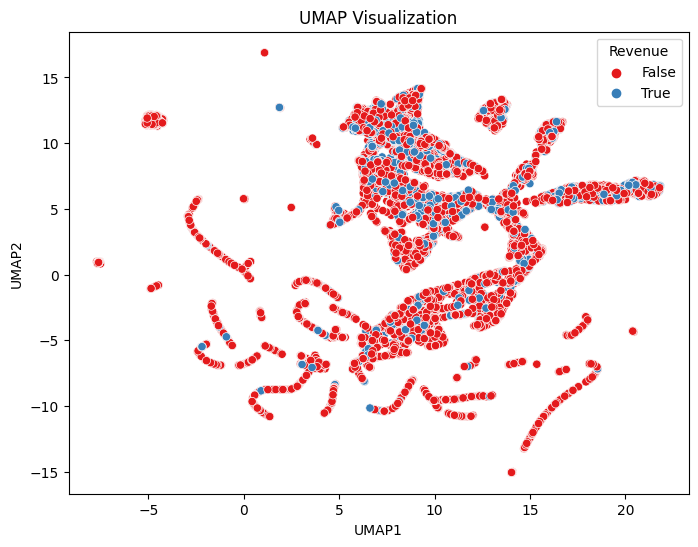

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap

# Load the data
data = pd.read_csv('online_shoppers_intention.csv')

# Select the columns for analysis
columns_for_analysis = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[columns_for_analysis])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Combine the PCA results with the target variable "Revenue"
pca_df['Revenue'] = data['Revenue']

# Plot PCA visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Revenue', palette='Set1')
plt.title('PCA Visualization')
plt.show()

# Perform UMAP
umap_result = umap.UMAP(n_components=2).fit_transform(data_scaled)

# Create a DataFrame with the UMAP results
umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2'])

# Combine the UMAP results with the target variable "Revenue"
umap_df['Revenue'] = data['Revenue']

# Plot UMAP visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='Revenue', palette='Set1')
plt.title('UMAP Visualization')
plt.show()


TASK 3	(35 Marks)

MovieReviews.csv contains 50,000 movie reviews. Each review is labelled as having either ‘positive’ or ‘negative’ sentiment.

Use PCA and UMAP dimensionality reduction techniques in Python to visually explore if there are two distinct clusters for positive and negative sentiment reviews. Try this by first converting text to a TF-IDF matrix. Discuss which technique worked better for visual exploration and why? If distinct clusters are visible, are there any sub-clusters within them? If distinct clusters are not visible, what could be the reason behind that?


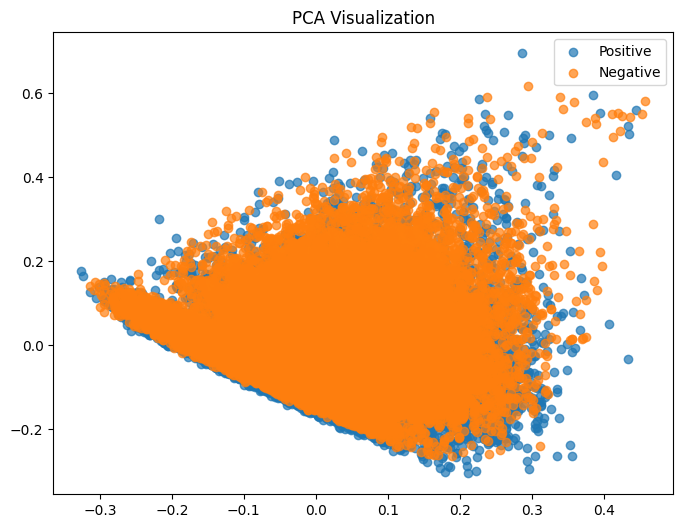

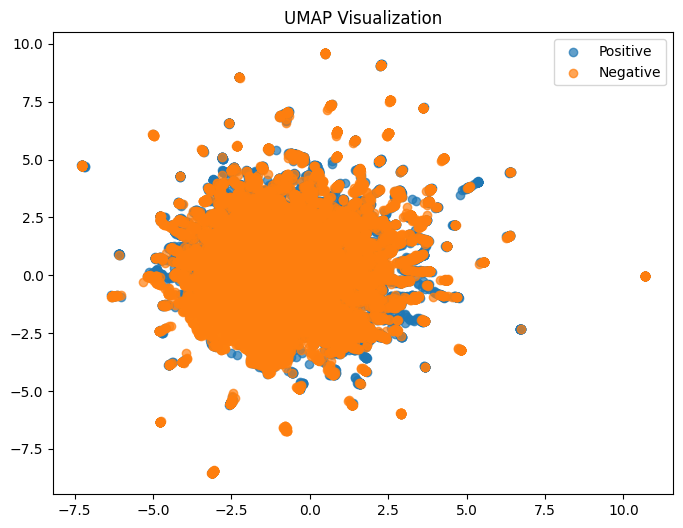

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('MovieReviews.csv')

# Preprocess text data (optional, based on the specific dataset and requirements)
# For example, remove punctuation, convert to lowercase, remove stop words, etc.

# Create the TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(data['review'])

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Combine the PCA results with the target variable "sentiment"
pca_df['sentiment'] = data['sentiment']

# Plot PCA visualization
plt.figure(figsize=(8, 6))
plt.scatter(pca_df.loc[pca_df['sentiment']=='positive', 'PC1'], pca_df.loc[pca_df['sentiment']=='positive', 'PC2'], label='Positive', alpha=0.7)
plt.scatter(pca_df.loc[pca_df['sentiment']=='negative', 'PC1'], pca_df.loc[pca_df['sentiment']=='negative', 'PC2'], label='Negative', alpha=0.7)
plt.legend()
plt.title('PCA Visualization')
plt.show()

# Perform UMAP
umap_result = umap.UMAP(n_components=2).fit_transform(tfidf_matrix.toarray())

# Create a DataFrame with the UMAP results
umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2'])

# Combine the UMAP results with the target variable "sentiment"
umap_df['sentiment'] = data['sentiment']

# Plot UMAP visualization
plt.figure(figsize=(8, 6))
plt.scatter(umap_df.loc[umap_df['sentiment']=='positive', 'UMAP1'], umap_df.loc[umap_df['sentiment']=='positive', 'UMAP2'], label='Positive', alpha=0.7)
plt.scatter(umap_df.loc[umap_df['sentiment']=='negative', 'UMAP1'], umap_df.loc[umap_df['sentiment']=='negative', 'UMAP2'], label='Negative', alpha=0.7)
plt.legend()
plt.title('UMAP Visualization')
plt.show()
